# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
cities_df = pd.read_csv(output_data_file)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Create url and unit for API call
url = ' http://api.openweathermap.org/data/2.5/weather?'
units = 'Imperial'
# query url
qurl = f'{url}&appid={weather_api_key}&units={units}&q='
# Preview the dataset to see dictionaries
data = requests.get(qurl + city).json()
pprint(data)

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 14.4, 'lon': 46.4667},
 'dt': 1632206744,
 'id': 72181,
 'main': {'feels_like': 85.87,
          'grnd_level': 889,
          'humidity': 37,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 86.92,
          'temp_max': 86.92,
          'temp_min': 86.92},
 'name': 'Marzuq',
 'sys': {'country': 'YE', 'sunrise': 1632192189, 'sunset': 1632235884},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'gust': 4.09, 'speed': 3.42}}


In [5]:
# Create empty lists for data storing
city_list = []
country = []
lat = []
lng = []
date = []
clouds = []
temp_max = []
humidity = []
wind_speed = []
# Set record counters
i = 1

In [6]:
# Perform API calls to check weather on each city
# Loop through data set using Try and Except
print("Beginning Data Retrieval")
print("-----------------------------")

for x in cities: 
    try:
        data = requests.get(qurl + x).json()
        city_list.append(data['name'])
        country.append(data['sys']['country'])
        lat.append(data['coord']['lat'])  
        lng.append(data['coord']['lon'])
        date.append(data['dt'])
        clouds.append(data['clouds']['all'])
        temp_max.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        wind_speed.append(data['wind']['speed'])
        print(f'Processing Record {i} of Set {i} | {x}')
        i += 1
    except (KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 2 | upernavik
Processing Record 3 of Set 3 | mataura
Processing Record 4 of Set 4 | krasnoarmeysk
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 6 | north bend
Processing Record 7 of Set 7 | nikolskoye
Processing Record 8 of Set 8 | hami
Processing Record 9 of Set 9 | naze
Processing Record 10 of Set 10 | omsukchan
Processing Record 11 of Set 11 | cabo san lucas
Processing Record 12 of Set 12 | bluff
Processing Record 13 of Set 13 | punta arenas
Processing Record 14 of Set 14 | rikitea
Processing Record 15 of Set 15 | victoria
Processing Record 16 of Set 16 | chuy
Processing Record 17 of Set 17 | pangai
City not found. Skipping...
Processing Record 18 of Set 18 | sibenik
Processing Record 19 of Set 19 | ushuaia
Processing Record 20 of Set 20 | tiksi
Processing Record 21 of Set 21 | poum
Processing Record 22 of Set 22 | gat
Processing Record 23 

Processing Record 179 of Set 179 | bemidji
Processing Record 180 of Set 180 | poya
Processing Record 181 of Set 181 | krasnoselkup
Processing Record 182 of Set 182 | souillac
City not found. Skipping...
Processing Record 183 of Set 183 | namibe
Processing Record 184 of Set 184 | kitimat
Processing Record 185 of Set 185 | port elizabeth
Processing Record 186 of Set 186 | la esperanza
Processing Record 187 of Set 187 | leningradskiy
Processing Record 188 of Set 188 | tenenkou
Processing Record 189 of Set 189 | olafsvik
City not found. Skipping...
Processing Record 190 of Set 190 | balkanabat
Processing Record 191 of Set 191 | vardo
Processing Record 192 of Set 192 | faanui
Processing Record 193 of Set 193 | kamaishi
Processing Record 194 of Set 194 | ippy
Processing Record 195 of Set 195 | mar del plata
City not found. Skipping...
Processing Record 196 of Set 196 | hualmay
Processing Record 197 of Set 197 | bubaque
Processing Record 198 of Set 198 | grindavik
Processing Record 199 of Set

Processing Record 351 of Set 351 | kieta
Processing Record 352 of Set 352 | tsaratanana
Processing Record 353 of Set 353 | aklavik
Processing Record 354 of Set 354 | resen
Processing Record 355 of Set 355 | hambantota
Processing Record 356 of Set 356 | shihezi
Processing Record 357 of Set 357 | sao filipe
Processing Record 358 of Set 358 | lukow
Processing Record 359 of Set 359 | hovd
Processing Record 360 of Set 360 | oranjemund
Processing Record 361 of Set 361 | lorengau
Processing Record 362 of Set 362 | vila velha
Processing Record 363 of Set 363 | klaksvik
Processing Record 364 of Set 364 | askarovo
Processing Record 365 of Set 365 | flinders
Processing Record 366 of Set 366 | sumbawanga
Processing Record 367 of Set 367 | ravar
Processing Record 368 of Set 368 | longyearbyen
Processing Record 369 of Set 369 | pemberton
Processing Record 370 of Set 370 | khonsa
Processing Record 371 of Set 371 | junqueiro
Processing Record 372 of Set 372 | rio gallegos
Processing Record 373 of Set 

Processing Record 530 of Set 530 | fort-shevchenko
Processing Record 531 of Set 531 | sironj
Processing Record 532 of Set 532 | rundu
Processing Record 533 of Set 533 | andenes
Processing Record 534 of Set 534 | mananjary
Processing Record 535 of Set 535 | labrea
Processing Record 536 of Set 536 | zanjan
Processing Record 537 of Set 537 | riyadh
Processing Record 538 of Set 538 | komsomolskiy
Processing Record 539 of Set 539 | oyama
City not found. Skipping...
Processing Record 540 of Set 540 | qaqortoq
Processing Record 541 of Set 541 | mayya
Processing Record 542 of Set 542 | broome
Processing Record 543 of Set 543 | huilong
Processing Record 544 of Set 544 | college
Processing Record 545 of Set 545 | opelousas
Processing Record 546 of Set 546 | sept-iles
Processing Record 547 of Set 547 | akyab
Processing Record 548 of Set 548 | terrace
Processing Record 549 of Set 549 | zaysan
Processing Record 550 of Set 550 | pangoa
Processing Record 551 of Set 551 | turukhansk
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create dataframe from lists
df = pd.DataFrame({'City' : city_list, 
                    'Country' : country,
                    'Lat' : lat,
                    'Lng' : lng,
                    'Date' : date,
                    'Cloudiness' : clouds,
                    'Max. Temp.' : temp_max,
                    'Humidity' : humidity,
                    'Wind Speed' : wind_speed})
# Export the city data into a .csv
df.to_csv('../output_data/CityWeather.csv')
# Display the DataFrame
df.head()

,City,Country,Lat,Lng,Date,Cloudiness,Max. Temp.,Humidity,Wind Speed
0,Atuona,PF,-9.8000,-139.0333,1632206745,0,77.72,72,20.62
1,Upernavik,GL,72.7868,-56.1549,1632206746,21,20.86,62,6.46
2,Mataura,NZ,-46.1927,168.8643,1632206747,4,45.86,80,5.03
3,Krasnoarmeysk,RU,51.0239,45.6969,1632206748,84,61.11,43,9.51
4,Puerto Ayora,EC,-0.7393,-90.3518,1632206749,20,66.96,83,8.34


In [8]:
# Perform statistical summary using describe method
df.describe()

,Lat,Lng,Date,Cloudiness,Max. Temp.,Humidity,Wind Speed
count,563.000000,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000
mean,21.368433,17.221697,1.632207e+09,51.891652,64.615861,68.174067,8.801510
std,33.130882,89.585209,1.213724e+02,41.341181,16.642355,21.840449,5.943116
min,-54.800000,-175.200000,1.632207e+09,0.000000,13.210000,9.000000,0.000000
25%,-6.467250,-58.208450,1.632207e+09,5.000000,50.810000,55.000000,4.470000
50%,27.483300,20.866700,1.632207e+09,58.000000,68.630000,72.000000,7.810000
75%,49.121550,92.270950,1.632207e+09,98.000000,78.015000,85.000000,12.045000
max,78.218600,179.316700,1.632207e+09,100.000000,98.650000,100.000000,40.420000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Check max. humidity 
df['Humidity'].max()

100

In [10]:
# There are no citis that have humidity more than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

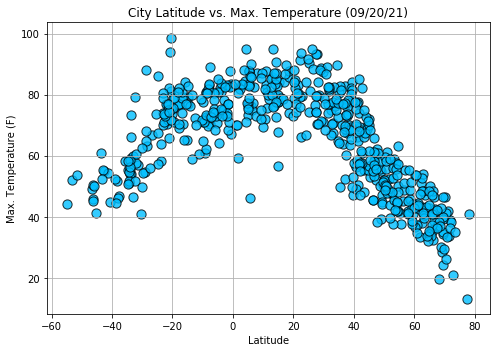

In [27]:
# Create scatter plot between latitude and max. temperature
fig1 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Max. Temp.',
                    title = 'City Latitude vs. Max. Temperature (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'deepskyblue',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    grid = True,
                   ylim = (min(df['Max. Temp.']) - 5, max(df['Max. Temp.'] + 5)))
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.tight_layout()
plt.savefig('../output_data/Lat_TempMax.png')

## Latitude vs. Humidity Plot

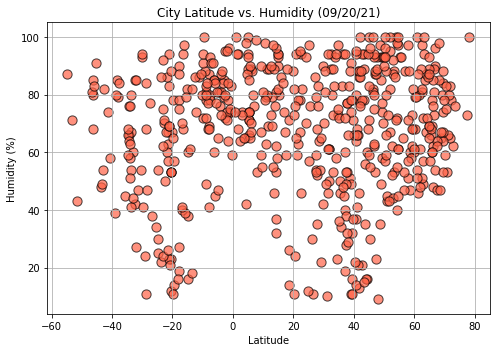

In [12]:
# Create scatter plot between latitude and humidity
fig2 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Humidity',
                    title = 'City Latitude vs. Humidity (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'tomato',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.7,
                    grid = True,
                   ylim = (min(df['Humidity']) - 5, max(df['Humidity'] + 5)))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_Humidity.png')

## Latitude vs. Cloudiness Plot

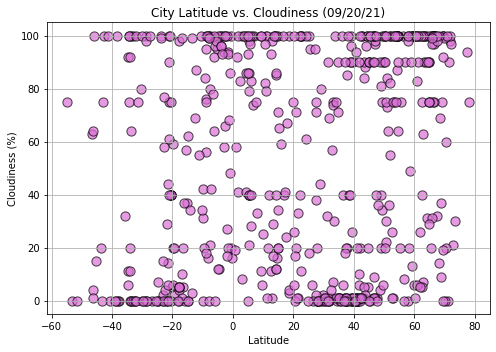

In [13]:
# Create scatter plot between latitude and cloudiness
fig3 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Cloudiness',
                    title = 'City Latitude vs. Cloudiness (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'orchid',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.7,
                    grid = True,
                   ylim = (min(df['Cloudiness']) - 5, max(df['Cloudiness'] + 5)))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_Cloudiness.png')

## Latitude vs. Wind Speed Plot

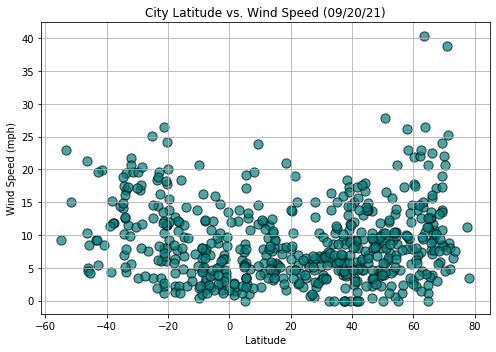

In [14]:
# Create scatter plot between latitude and wind speed
fig4 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Wind Speed',
                    title = 'City Latitude vs. Wind Speed (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'teal',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.7,
                    grid = True,
                   ylim = (min(df['Wind Speed']) - 2, max(df['Wind Speed'] + 2)))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('../output_data/Lat_WindSpeed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Determine Northern Hemisphere and Southern Hemisphere
lat_north = df[df['Lat'] >= 0]
lat_south = df[df['Lat'] <= 0]

The r-value is: -0.8516555433262317


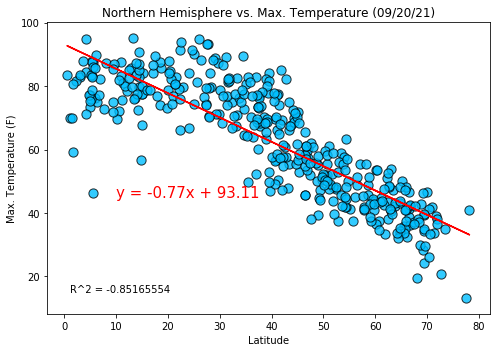

In [16]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Max. Temp.'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Max. Temp.',
                    title = 'Northern Hemisphere vs. Max. Temperature (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'deepskyblue',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Max. Temp.']) - 5, max(lat_north['Max. Temp.'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (10, 45), fontsize = 15, color = "red")
plt.text(1, 15, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_TempMax_Reg.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7296931813960683


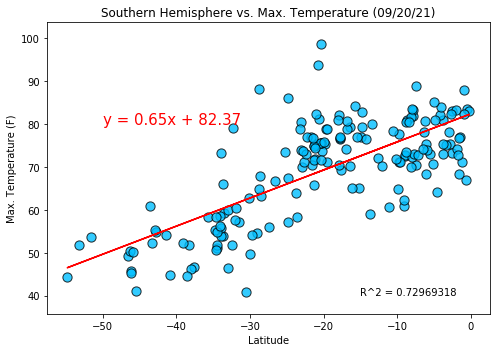

In [17]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Max. Temp.'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Max. Temp.',
                    title = 'Southern Hemisphere vs. Max. Temperature (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'deepskyblue',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Max. Temp.']) - 5, max(lat_south['Max. Temp.'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-50, 80), fontsize = 15, color = "red")
plt.text(-15, 40, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_TempMax_Reg.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.009649186245415822


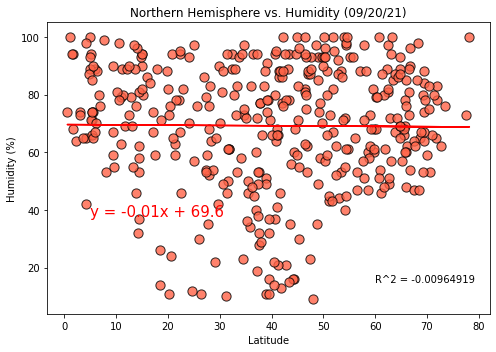

In [18]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Humidity'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Humidity',
                    title = 'Northern Hemisphere vs. Humidity (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'tomato',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Humidity']) - 5, max(lat_north['Humidity'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (5, 38), fontsize = 15, color = "red")
plt.text(60, 15, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_Humid_Reg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20475814050418872


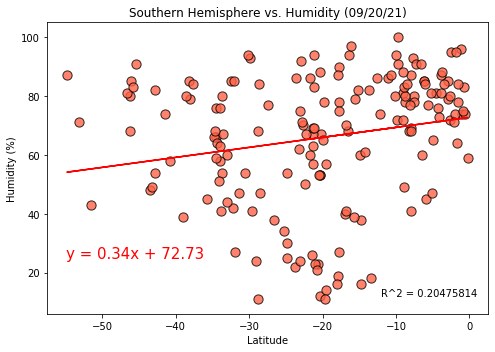

In [25]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Humidity'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Humidity',
                    title = 'Southern Hemisphere vs. Humidity (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'tomato',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Humidity']) - 5, max(lat_south['Humidity'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-55, 25), fontsize = 15, color = "red")
plt.text(-12, 12, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_Humid_Reg.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14456330990929886


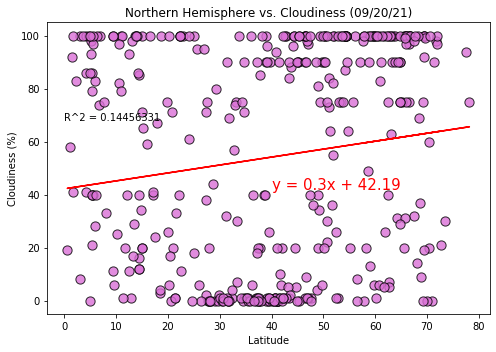

In [24]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Cloudiness'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Cloudiness',
                    title = 'Northern Hemisphere vs. Cloudiness (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'orchid',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Cloudiness']) - 5, max(lat_north['Cloudiness'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (40, 42), fontsize = 15, color = "red")
plt.text(0, 68, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_Cloud_Reg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2581185091658064


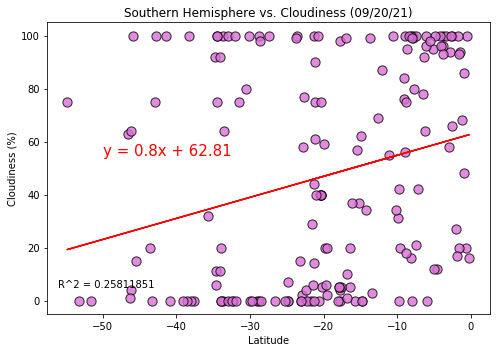

In [21]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Cloudiness'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Cloudiness',
                    title = 'Southern Hemisphere vs. Cloudiness (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'orchid',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Cloudiness']) - 5, max(lat_south['Cloudiness'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-50, 55), fontsize = 15, color = "red")
plt.text(-56, 5, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_Cloud_Reg.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.25382469601532137


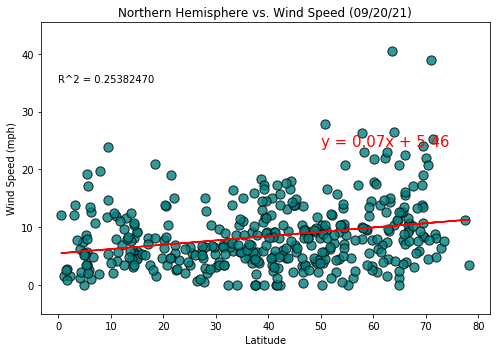

In [22]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Wind Speed'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Wind Speed',
                    title = 'Northern Hemisphere vs. Wind Speed (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'teal',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Wind Speed'] - 5), max(lat_north['Wind Speed'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (50, 24), fontsize = 15, color = "red")
plt.text(0, 35, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_Wind_Reg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3986085369623857


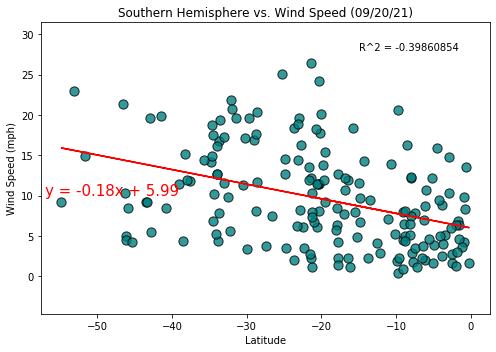

In [23]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Wind Speed'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Wind Speed',
                    title = 'Southern Hemisphere vs. Wind Speed (09/20/21)',
                    figsize = (7, 5),
                    s = 85,
                    color = 'teal',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Wind Speed'] - 5), max(lat_south['Wind Speed'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-57, 10), fontsize = 15, color = "red")
plt.text(-15, 28, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_Wind_Reg.png')